# Stock Portfolio Allocation

Here, we work on stock portfolio allocation and analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let us take stocks from 1st Jan 2018 to the current date.

In [2]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

Let us take AAPL, GOOG, CSCO and IBM.

In [3]:
aapl = web.DataReader("AAPL", 'yahoo', start, end)  # Collects data
aapl.reset_index(inplace=True)
aapl.set_index("Date", inplace=True)

In [4]:
goog = web.DataReader("GOOG", 'yahoo', start, end)  # Collects data
goog.reset_index(inplace=True)
goog.set_index("Date", inplace=True)

In [5]:
csco = web.DataReader("CSCO", 'yahoo', start, end)  # Collects data
csco.reset_index(inplace=True)
csco.set_index("Date", inplace=True)

In [6]:
ibm = web.DataReader("IBM", 'yahoo', start, end)  # Collects data
ibm.reset_index(inplace=True)
ibm.set_index("Date", inplace=True)

To make things uniform, we will be working on Adjusted Closing value.

In [7]:
ibm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,126.029999,123.989998,124.220001,125.879997,3574400.0,124.220062
2021-01-04,125.919998,123.040001,125.849998,123.940002,5179200.0,122.305649
2021-01-05,126.680000,124.610001,125.010002,126.139999,6114600.0,124.476639
2021-01-06,131.880005,126.720001,126.900002,129.289993,7956700.0,127.585091
2021-01-07,130.460007,128.259995,130.039993,128.990005,4507400.0,127.289062


Now we calculate the normed return. 
Returns to be calculated as over the Adj Close value on Day 0. 

In [8]:
for stock_df in (aapl,goog,csco,ibm):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [9]:
ibm.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return
Date,,,,,,,
2020-12-31,126.029999,123.989998,124.220001,125.879997,3574400.0,124.220062,1.000000
2021-01-04,125.919998,123.040001,125.849998,123.940002,5179200.0,122.305649,0.984589
2021-01-05,126.680000,124.610001,125.010002,126.139999,6114600.0,124.476639,1.002065
2021-01-06,131.880005,126.720001,126.900002,129.289993,7956700.0,127.585091,1.027089
2021-01-07,130.460007,128.259995,130.039993,128.990005,4507400.0,127.289062,1.024706


In [10]:
ibm.tail()

,High,Low,Open,Close,Volume,Adj Close,Normed Return
Date,,,,,,,
2021-03-23,131.559998,129.800003,130.440002,130.460007,4356400.0,130.460007,1.050233
2021-03-24,132.110001,130.570007,130.949997,130.619995,4005000.0,130.619995,1.051521
2021-03-25,133.240005,129.770004,130.330002,133.070007,5554000.0,133.070007,1.071244
2021-03-26,136.479996,133.119995,133.289993,136.380005,5562500.0,136.380005,1.097890
2021-03-29,137.070007,135.509995,135.979996,135.860001,4620900.0,135.860001,1.093704


# Allocations

Let us take Sample Allocations. 

AAPL- 30 % - 0.3

GOOG- 20 % - 0.2

CSCO- 40 % - 0.4

IBM-  10 % - 0.1


In [11]:
for stock_df,allo in zip([aapl,goog,csco,ibm],[.3,.2,.4,.1]): 
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [12]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.492020,1.000000,0.300000
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,129.216919,0.975281,0.292584
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.814514,0.987339,0.296202
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,126.411102,0.954104,0.286231
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,130.724655,0.986661,0.295998


In [13]:
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2021-03-23,124.239998,122.139999,123.330002,122.540001,95467100.0,122.540001,0.924886,0.277466
2021-03-24,122.900002,120.070000,122.820000,120.089996,88530500.0,120.089996,0.906394,0.271918
2021-03-25,121.660004,119.000000,119.540001,120.589996,98844700.0,120.589996,0.910168,0.273050
2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999,0.914848,0.274454
2021-03-29,122.580002,120.730003,121.650002,121.389999,80742600.0,121.389999,0.916206,0.274862


In [14]:
ibm.tail()

,High,Low,Open,Close,Volume,Adj Close,Normed Return,Allocation
Date,,,,,,,,
2021-03-23,131.559998,129.800003,130.440002,130.460007,4356400.0,130.460007,1.050233,0.105023
2021-03-24,132.110001,130.570007,130.949997,130.619995,4005000.0,130.619995,1.051521,0.105152
2021-03-25,133.240005,129.770004,130.330002,133.070007,5554000.0,133.070007,1.071244,0.107124
2021-03-26,136.479996,133.119995,133.289993,136.380005,5562500.0,136.380005,1.097890,0.109789
2021-03-29,137.070007,135.509995,135.979996,135.860001,4620900.0,135.860001,1.093704,0.109370


# Investment

Assuming 1,00,000 investment.

In [15]:
for stock_df in [aapl,goog,csco,ibm]:
    stock_df['Position Values'] = stock_df['Allocation']*100000

# Portfolio Analysis

In [16]:
portfolio_val = pd.concat([aapl['Position Values'],goog['Position Values'],csco['Position Values'],ibm['Position Values']],axis=1)

In [17]:
portfolio_val.columns= ["AAPL","GOOG","CSCO","IBM"]

In [18]:
portfolio_val.head()

,AAPL,GOOG,CSCO,IBM
Date,,,,
2020-12-31,30000.000000,20000.000000,40000.000000,10000.000000
2021-01-04,29258.423100,19730.118335,39612.525063,9845.885325
2021-01-05,29620.164558,19874.877721,39630.547553,10020.655000
2021-01-06,28623.105594,19810.603857,40009.012964,10270.892505
2021-01-07,29599.817897,20403.794724,40513.628928,10247.061561


In [19]:
portfolio_val.tail()

,AAPL,GOOG,CSCO,IBM
Date,,,,
2021-03-23,27746.577017,23437.221216,45064.202757,10502.329845
2021-03-24,27191.825587,23347.033506,44739.808253,10515.209278
2021-03-25,27305.039953,23339.041255,45514.754689,10712.440882
2021-03-26,27445.426389,23238.464314,47371.029887,10978.903279
2021-03-29,27486.183630,23471.355863,47325.975382,10937.041742


In [20]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [21]:
portfolio_val.head()

,AAPL,GOOG,CSCO,IBM,Total Pos
Date,,,,,
2020-12-31,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000
2021-01-04,29258.423100,19730.118335,39612.525063,9845.885325,98446.951823
2021-01-05,29620.164558,19874.877721,39630.547553,10020.655000,99146.244832
2021-01-06,28623.105594,19810.603857,40009.012964,10270.892505,98713.614919
2021-01-07,29599.817897,20403.794724,40513.628928,10247.061561,100764.303109


In [22]:
portfolio_val.tail()

,AAPL,GOOG,CSCO,IBM,Total Pos
Date,,,,,
2021-03-23,27746.577017,23437.221216,45064.202757,10502.329845,106750.330835
2021-03-24,27191.825587,23347.033506,44739.808253,10515.209278,105793.876624
2021-03-25,27305.039953,23339.041255,45514.754689,10712.440882,106871.276779
2021-03-26,27445.426389,23238.464314,47371.029887,10978.903279,109033.823870
2021-03-29,27486.183630,23471.355863,47325.975382,10937.041742,109220.556617


We had assumed 1,00,000 value portfolio, so the total value on the last date, shows whether we have gained or lost money.

Text(0.5, 1.0, 'Total Portfolio Value')

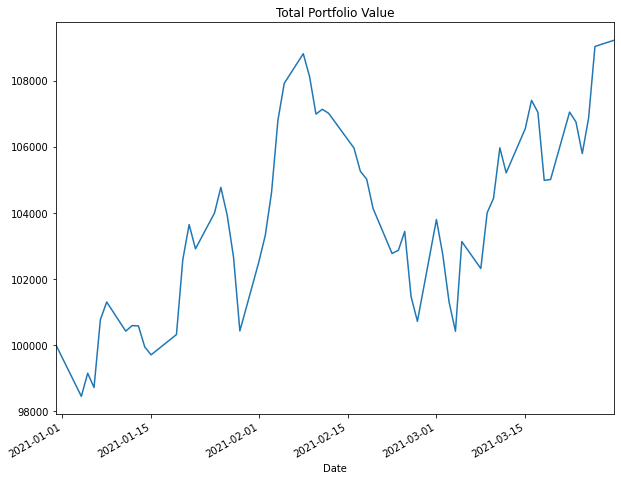

In [23]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

#portfolio value over time

Text(0.5, 1.0, 'Value of each stock with Time')

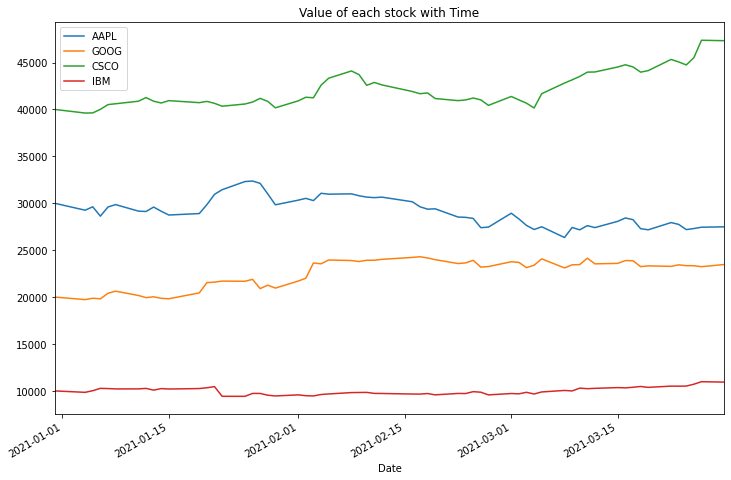

In [24]:
portfolio_val.drop('Total Pos',axis=1).plot(kind='line',figsize=(12,8))
plt.title('Value of each stock with Time')

In [29]:
portfolio_val.head(5)

,AAPL,GOOG,CSCO,IBM,Total Pos
Date,,,,,
2020-12-31,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000
2021-01-04,29258.423100,19730.118335,39612.525063,9845.885325,98446.951823
2021-01-05,29620.164558,19874.877721,39630.547553,10020.655000,99146.244832
2021-01-06,28623.105594,19810.603857,40009.012964,10270.892505,98713.614919
2021-01-07,29599.817897,20403.794724,40513.628928,10247.061561,100764.303109


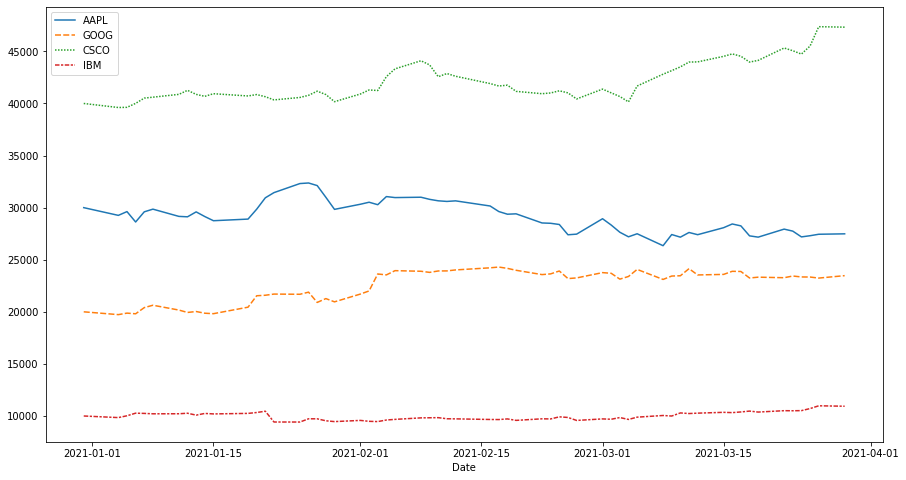

In [30]:
plt.figure(figsize=(15,8))
sns.lineplot(data=portfolio_val.drop(['Total Pos'],axis=1))


# Portfolio Statistics

# Daily Returns

In [31]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

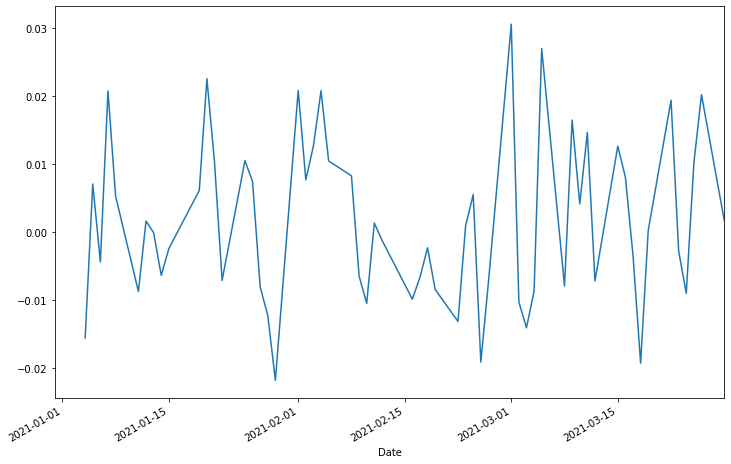

In [32]:
portfolio_val['Daily Return'].plot(figsize=(12,8))

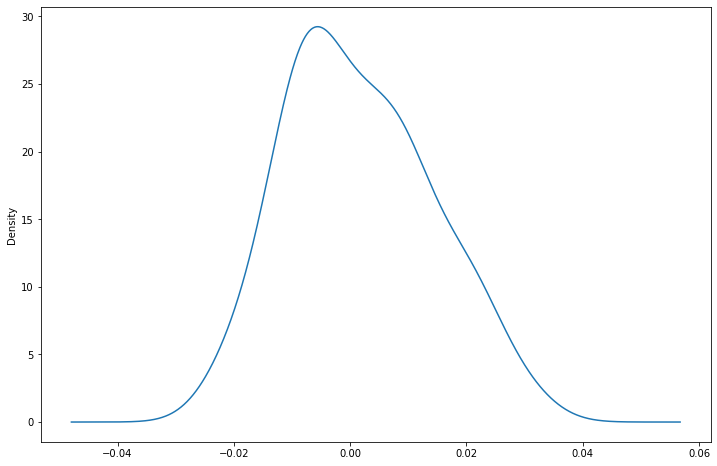

In [33]:
portfolio_val['Daily Return'].plot(kind="kde",figsize=(12,8))

The area under the +ve part is more, so we can deduce that the returns have been more in positive side.

# Avg Daily Returns

In [34]:
portfolio_val['Daily Return'].mean()

0.0015704098797461455

# Std Daily Returns

In [35]:
portfolio_val['Daily Return'].std()

0.01232798473353938

# Sharpe Ratio

The Sharpe ratio adjusts a portfolio’s past performance—or expected future performance—for the excess risk that was taken by the investor.

A high Sharpe ratio is good when compared to similar portfolios or funds with lower returns.

The Sharpe ratio has several weaknesses, including an assumption that investment returns are normally distributed.

Read more- https://www.investopedia.com/terms/s/sharperatio.asp

In [36]:
SR = portfolio_val['Daily Return'].mean()/portfolio_val['Daily Return'].std()

In [37]:
SR

0.12738577421123062

In [38]:
ASR = (252**0.5)*SR

In [39]:
ASR

2.022186474782048

In [40]:
portfolio_val['Daily Return'].std()

0.01232798473353938

In [41]:
portfolio_val['Daily Return'].mean()

0.0015704098797461455

Text(0.5, 1.0, 'AAPL RETURNS KDE')

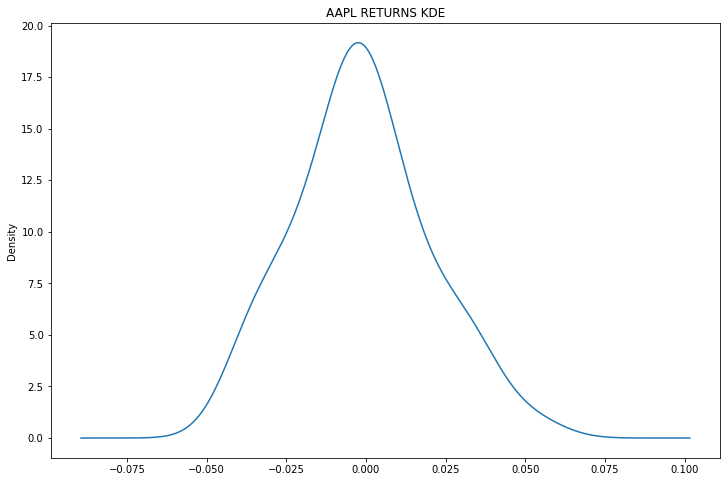

In [42]:
aapl['Adj Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
plt.title("AAPL RETURNS KDE")

Text(0.5, 1.0, 'CSCO RETURNS KDE')

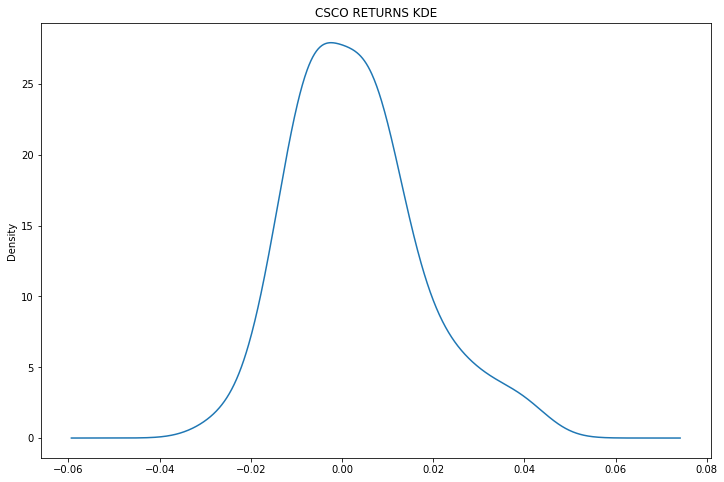

In [43]:
csco['Adj Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
plt.title("CSCO RETURNS KDE")

Text(0.5, 1.0, 'GOOG RETURNS KDE')

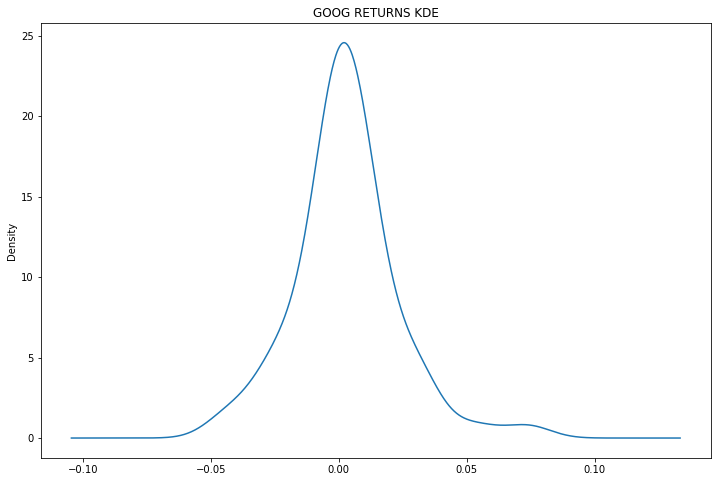

In [44]:
goog['Adj Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
plt.title("GOOG RETURNS KDE")

Text(0.5, 1.0, 'IBM RETURNS KDE')

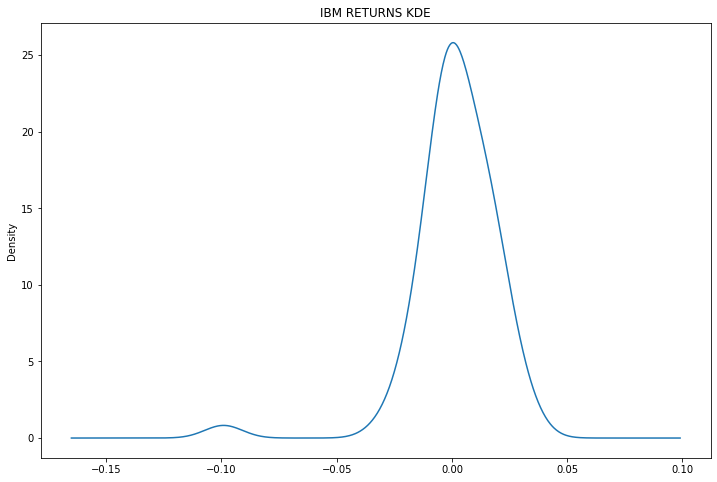

In [45]:
ibm['Adj Close'].pct_change(1).plot(kind='kde',figsize=(12,8))
plt.title("IBM RETURNS KDE")

In [46]:
portfolio_val

,AAPL,GOOG,CSCO,IBM,Total Pos,Daily Return
Date,,,,,,
2020-12-31,30000.000000,20000.000000,40000.000000,10000.000000,100000.000000,NaN
2021-01-04,29258.423100,19730.118335,39612.525063,9845.885325,98446.951823,-0.015530
2021-01-05,29620.164558,19874.877721,39630.547553,10020.655000,99146.244832,0.007103
2021-01-06,28623.105594,19810.603857,40009.012964,10270.892505,98713.614919,-0.004364
2021-01-07,29599.817897,20403.794724,40513.628928,10247.061561,100764.303109,0.020774
2021-01-08,29855.299962,20631.663766,40603.741377,10210.518241,101301.223345,0.005328
2021-01-11,29161.202060,20169.417606,40874.071849,10214.490781,100419.182296,-0.008707
2021-01-12,29120.505282,19939.151585,41261.546785,10264.538774,100585.742426,0.001659
2021-01-13,29593.035677,20028.769317,40874.071849,10082.618771,100578.495613,-0.000072
